<a href="https://colab.research.google.com/github/Owlmanandy/ATMS-421-Projects/blob/master/ESM_Assignment_3_Finite_Differences_and_Sensitivity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This is the first thing we always do if we want to import data or write files.
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#THE FISH MODEL
import matplotlib.pyplot as plt
import numpy as np

def migrator(size, bins): #m: no. of fish migrating (1/3 to 1/4 of pop), bins: no. of days where migration happens
  from numpy.random import normal
  '''
  documentation: 
  input: size=no. of random number drawn, bins = days that fish migrate
  output: migration rate, no. of fish that migrate per day
  '''
  mig = normal(size = size, scale = 7, loc = 30)
  hist, bin_edges = np.histogram(mig, bins = bins, density = True)
  #plt.hist(mig, bins = bins)
  return hist


def fishy(param,sim_time,timestep):
  import numpy as np
  '''
  '''
  stock = param[0]
  death= param[1] #linearized slope of the exponential function, roughly the growth rate
  carry_cap = param[2] #carrying capacity in terms of individuals
  ini_cond = param[3] #initial population
  mig_frac = param[4] #fraction of population that migrates every year
  #could include parameteres for migration
  
  n = int(np.ceil(sim_time/timestep)) 
  pop = np.zeros([n,2])
  pop[0,0] = 0 
  pop[0,1] = ini_cond  
  
  #currently fish migration probabilities are calculated before the simulation.  Might want to include this in the integration loop (it's included now)
  #fish_mig = mig_frac*migrator(100,60) #probability
  
  for i in range(n-1):
    year = int(i*timestep/365) #this tells you what year you're on, using day timesteps
    days = int((i*timestep)%365)
    #new_year = int()
    #print(days, year)
    
    if days is 1:
      fish_mig = mig_frac*migrator(100,60) #this allows the migration rate to randomize each year
    
    if days >= 270 and days < 330:
      migrate = fish_mig[days - 270]
    else:
      migrate = 0
    
    pop[i+1,1] = (stock - (migrate + death)*pop[i,1])*(1 - pop[i,1]/carry_cap)*timestep + pop[i,1]  #THIS IS THE ACTUAL EQUATION, where the next value equals the previous values added together.
    pop[i+1,0] = pop[i,0] + timestep
    
    if pop[i,1]<0:
      pop[i,1]=0
  
  return pop
              
#param=[stock,death,carry_cap,ini_cond,mig_frac]
#param = [(2.4e6/365),0.001,2.4e8,1.4e5,(1/3)]
#plt.plot(fishy(param,365*10,.1)[:,0],fishy(param,365*10,.1)[:,1])

<h1>Earth Systems Modeling</h1>
<h2>Assignment 3: The Finite Difference Approximation [60 pts]</h2>
<p>In this assignment you will ...
<ul>
<li>Review, identify, and apply simple finite difference approximations.</li>
<li>Benchmark your new Runge-Kutta solvers, and examine the relationship between error and timestep.</li>
<li>Perform a basic sensitivity analysis with your fish model.</li>
</ul>
</p>

Yes, the Runge-Kutta fourth order approximation is still discussed- here is a thread from 2016: <a href="https://www.researchgate.net/post/Faster_and_better_than_Runge-Kutta_4th_order_ODE_solver">https://www.researchgate.net/post/Faster_and_better_than_Runge-Kutta_4th_order_ODE_solver</a>. What is not noted is that 6th order Runge-Kutta solvers are highly customized to the problem at hand. The Weather Research and Forecasting Model has a 6th order option for advection that is customized for fluid dynamics. It uses a third order option for other processes. You can read more here: <a href="http://cires1.colorado.edu/science/groups/pielke/classes/at7500/Bianco_PresentationWRF.pdf">http://cires1.colorado.edu/science/groups/pielke/classes/at7500/Bianco_PresentationWRF.pdf</a>

<h3>Problem 1: Finite Difference Solutions to the Diffusion Equation [20 pts]</h3>
<p>Write a finite difference expression for each of equations below as Python code. You can look at these web pages for more direction regarding the different approximations here: https://en.wikipedia.org/wiki/Finite_difference, or http://www.mathematik.uni-dortmund.de/~kuzmin/cfdintro/lecture4.pdf, or http://mathworld.wolfram.com/FiniteDifference.html. What I am looking for is code that you might be able to solve with a loop. </p>

<ol>
<li>Use the forward difference [2 pts]: <br>
    $$\nabla \cdot E = \frac{\partial E}{\partial z} = \frac {\rho (z, t)}{\epsilon_0}$$</li>
<br>
<li>Use the forward difference [2 pts] and backward difference [2 pts]: <br>
    $$\frac{dy}{dt} = 2tye^{2t} + y $$</li>
<br>
<li>Use the backward difference [2 pts] and the central difference [2 pts]: <br> <br>
    $$\frac{dy}{dt} = a \cdot sin(y) $$<br></li></ol>
    <br>
<p>Short Answer Questions: </p>
<ol>
<li>Which of the three difference methods is easiest to solve with a for loop approach? Why? [2 pts]</li>
<li>Which of the three difference methods would require an initial condition (at $t_0$) and either a second condition (at $t_1$) or a sophisticated estimate of the second value (at $t_2$)? [2 pts]</li>
<li>Which of the three difference methods requires solving an algebraic problem or an optimization approach? [2 pts]</li>
<li>Which of the three methods is the better approximation? Why? [2 pts]</li>
<li>Which method is used in this code? <a href="http://www-t.eng.cam.ac.uk/1a/electromagnetics/mshell/mat1.m">http://www-t.eng.cam.ac.uk/1a/electromagnetics/mshell/mat1.m</a> [2 pts] (Hint: You could look at the Wikipedia page under the heading "Finite Difference in several variables", and look for the variable $a$ to figure this out.)</li></ol>


In [0]:
# Put code for your finite difference approximations here
import numpy as np

# 1 Forward Difference
E[i+1] = (rho(z,t)/e0)*Dz + E[i]

# 2 Forward Difference
Y[i+1] = (2*t*y*np.exp(2*t) + y)*Dt + Y[i]

# 2 Backward Difference
Y[i] = (2*t*y[i]*np.exp(2*t) + y[i])*Dt - Y[i-1]

# 3 Backward Difference
Y[i] = a*np.sin(y[i])*Dt + Y[i-1]

# 3 Central Difference
Y[i+1] = a*np.sin(y)*2*Dt + Y[i-1]

YOUR TEXT ANSWERS HERE

1. I think that the forward difference is easiest to solve with a for loop because it calculates the change between the current term and the next term and uses that to calculate the next term by adding it to the current term; it doesn't require multiple calculations or going backwards to previous terms, like the other two methods.  It also does not require an initial condition or a second condition.

2. The backward difference method requires an initial condition (one term behind i), and the central difference method requires an intial condition and a second condition to provide the average between the forward and backward differences.

3. For the most part, the backwards difference requires the most algebraic solving.  It also requires an optimization option, where you try to find the best initial conditions.  For this reason, it's very computationally expensive.

4. Logically, I would think that the central difference is the best estimate since it has the most data points, and from what I learned in statistics, I believe that the more data points we have, the more accurate the answer will be.  Also, central difference produces second order truncation error, with a smaller error range, compared to forward/backward difference, which produces first order (larger) error.

5. This appears to use a central difference method, since it takes both the forward term and the backwards term and averages them out.

<h3>Problem 2: Basic Sensitivity Analysis [20 pts]</h3>
<p>In this next problem, you are going to figure out how to run a sensitivity analysis. There are a few approaches to such an analysis, and if we were doing this for research, we would take a more exhaustive approach. In a typical sesnitivity analysis, the parameters are either systematically or randomly varied and the model output is statistically queried. In a systematic approach we might select 3 test cases for each parameter. Since we have about 4 parameters, we end up with 81 combinations of test cases to examine. This is where a randomized approach helps, we could look at a random subset of parameter combinations to identify where finer sampling may be required.</p>
    
<p>Once we achieve a stablized fish population, we will define the parameters used as our baseline. You can fill in table 1 below with your baseline values. (Note: These baseline values may/will vary between groups!). If we have an idea of what the standard deviation of parameter values might be, then we can make an estimate for the variation of our parameter (perhaps we would examine 2$\sigma$ (95%) to 3$\sigma$ (99.9%)). We could take this approach with out migration rate, since we know somewhere between 1/4 to 1/3 of the population should leave in any given year. Other parameters could vary by orders of magnitude depending on what you want to test.
    
<p>Another way to select a parameter range is to hold all parameters at baseline, and then vary just one parameter incrementaly to see what happens to your model. A feasible range for the parameter could be selected in this way. Let's take this approach this for the death rate. </p>

<h4>Instructions</h4>
Create an array of about 6 values that incrementally changes your death rate constant by 2 to 3 orders of magnitude less than and greater than the current value (This could depend on the sensitivity of the constant). Plot your results (i.e., if your death rate is 0.5 fish you might look at 0.5*[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]). Please try to use a for loop to run the simulations and make your plots. [10 pts]</p>

<p>Follow the above instructions to repeat the same process for the stocking rate. [10 pts] (This is just for fun, this is the one piece of inforamtion we know fairly certainly.)</p>

Table 1. FISHY Model Parameters for the population of coho salmon in Lake Michigan, and rough estimates for a range of parameters to examine.
<table>
<tr>
<th>Parameter</th>
<th>Symbol</th>
<th>Baseline</th>
<th>+/-</th>
</tr> 
<tr>
<td>Death Rate</td>
<td>w</td>
<td>w = x0*5e-6/365.25</td>
<td>w*1E+/-2</td>
</tr>
<tr>
<td>Carrying Capacity</td>
<td>k</td>
<td>k = x0*10</td>
<td>k*1E+/-3</td>
</tr>
<tr>
<td>Fixed Stocking Rate</td>
<td>s</td>
<td>s = 1473881/365.25</td>
<td>s*1E+/-2</td>
</tr>
<tr>
<td>Migration Rate Constant <br> (If you used this parmeter.) </td>
<td>m</td>
<td>0.30</td>
<td>+/-0.2</td>
</tr>
</table>


/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


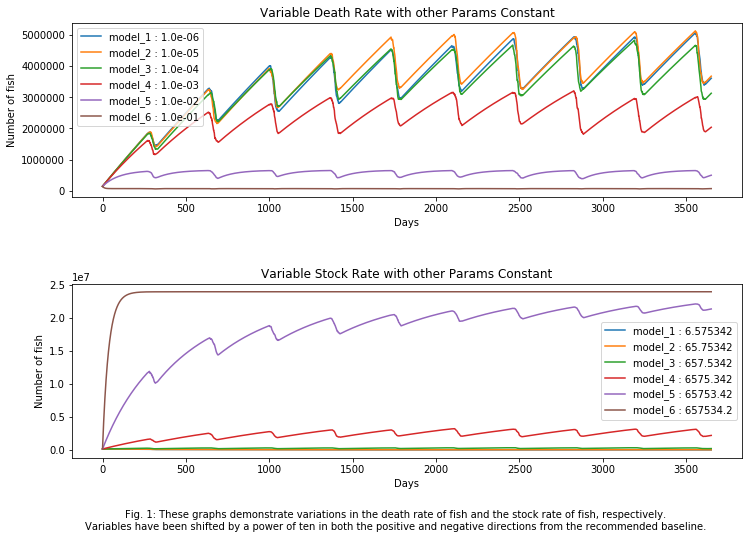

In [0]:
import numpy as np
import matplotlib.pyplot as plt

death_sens = np.zeros(6)
for i in range(6):
  death_sens[i] = 0.001*10**(i-3)
  
stock_sens = np.zeros(6)
for i in range(6):
  stock_sens[i] = (2.4e6*10**(i-3))/365

fig,ax = plt.subplots(2,figsize=(12,8))
fig.subplots_adjust(hspace=0.5)
  
model_results_omega={}
for i in range(len(death_sens)):
  #param=[stock,death,carry_cap,ini_cond,mig_frac]
  param = [(2.4e6/365),death_sens[i],2.4e7,1.4e5,1/3]
  model_results_omega["death_model_{0}".format(i+1)] = fishy(param,365*10,.1)
  ax[0].plot(fishy(param,365*10,.1)[:,0],fishy(param,365*10,.1)[:,1],label='model_{0} : {1:1.1e}'.format(i+1, death_sens[i]))
  
ax[0].legend()
ax[0].set_title('Variable Death Rate with other Params Constant')
ax[0].set_ylabel('Number of fish')
ax[0].set_xlabel('Days')

model_results_stock={}

for i in range(len(stock_sens)):
  param = [stock_sens[i],0.001,2.4e7,1.4e5,1/3]
  model_results_stock["stock_model_{0}".format(i+1)] = fishy(param,365*10,.1) #how to adjust the model name?
  #leg2.append('{0:1.3E}'.format(stock_sens[i]))
  ax[1].plot(fishy(param,365*10,.1)[:,0],fishy(param,365*10,.1)[:,1],label='model_{0} : {1:1.7}'.format(i+1, stock_sens[i]))
  
ax[1].legend()
ax[1].set_title('Variable Stock Rate with other Params Constant')
ax[1].set_ylabel('Number of fish')
ax[1].set_xlabel('Days')
fig.text(.5,0,'Fig. 1: These graphs demonstrate variations in the death rate of fish and the stock rate of fish, respectively.' +\
         '\nVariables have been shifted by a power of ten in both the positive and negative directions from the recommended baseline.',ha='center')
plt.show()
#print(model_results_stock)

In [0]:
print(dict.keys(model_results_omega))
print(dict.keys(model_results_stock))
print(model_results_omega['death_model_1'])
#model_results_omega["0"]
#model_results_stock[]

dict_keys(['death_model_1', 'death_model_2', 'death_model_3', 'death_model_4', 'death_model_5', 'death_model_6'])
dict_keys(['stock_model_1', 'stock_model_2', 'stock_model_3', 'stock_model_4', 'stock_model_5', 'stock_model_6'])
[[0.00000000e+00 1.40000000e+05]
 [1.00000000e-01 1.40653685e+05]
 [2.00000000e-01 1.41307351e+05]
 ...
 [3.64970000e+03 4.11659644e+06]
 [3.64980000e+03 4.11714085e+06]
 [3.64990000e+03 4.11768524e+06]]


<h3>Problem 3: Factorial Design for Sensitivity Analysis [20 pts]</h3>
<p>As discussed in class, we could also lump the initial condition into this model to test. However, this just needlessly complicates our analysis. Our next step is going to be systematically vary our parameters, plot the variations, and also track some statistics about the variations. In this next analysis, you will select a range around your death rate and stocking rate to test. You'll want to use the tests above to select a range to examine. If we were doing this for research, we would probably want to look at tighter parameter ranges that are couched by observations. Without observations, we can play a bit more here. Your second number should be the baseline parameter from above. You can decide upon the range around the baseline you want to test.</p>
<h4>Part 1: Select three values to test for the death and stocking rates. [4 pts]</h4>
I selected dm1, dm4, dm5, and sm3, sm4, and sm5.  These correspond to the values for the death model 1.0e-6, 1.0e-3, 1.0e-2, and stock model 657.5432, 6575.432, 65754.32 respectively.
<h4>Part 2: Run 9 simulations testing the combination of parameters you selected, and plot your results. [6 pts]</h4>
<p>You can use two nested loops (a loop within a loop) to go through all of the parameter possibilities, or you can work through one loop using a list comprehension:
<pre>
for x, y in [(x,y) for x in stock_array for y in omega_array]:
    print (x, y)
</pre>
OR with itertools:
<pre>
import itertools
y = list(itertools.product(stock_array,death_array))
</pre>

<h4>Part 3: Calculate the metrics for your simulations as described below. The first three examine </h4>
<p>The table provided below is a guideline on the data and metrics you should collect. You can simply print out your metrics at the end of your code rather than filling in the table (to save time). [10 pts] Filling in the table is worth 5 pts of extra credit. </p>
<pre>
1. Maximum Population = np.max(X[i])
2. Minimum Population = np.min(X[i])
3. Final Population Value = X[-1]   
4. Average Difference from Baseline = np.sum(X[i] - X_baseline[i])/n+1
5. RMS Error from Baseline = np.sqrt(np.sum((X[i] - X_baseline[i])**2)/(n+1))
6. Maximum Difference from Baseline = np.max(np.abs(X[i] - X_baseline[i]))</pre>

<table>
<tr>
<th>Run</th>
<th>w</th>
<th>k</th>
<th>s</th>
<th>m</th>
<th>Maximum Population</th>
<th>Minimum Population</th>
<th>Final Population Value</th>    
<th>Average Difference from Baseline</th>
<th>RMS Difference from Baseline</th>
<th>Maximum Difference from Baseline</th>
</tr>
<tr>
<td>1</td>
<td>dm1</td>
<td>k1</td>
<td>sm5</td>
<td>m1</td>
<td>23893544.64</td>
<td>140000</td>
<td>23857330.40</td>
<td>14888546.52</td>
<td>15529675.89</td>
<td>19366225.01</td>
</tr>
<tr>
<td>2</td>
<td>dm4</td>
<td>k1</td>
<td>sm5</td>
<td>m1</td>
<td>22494114.89</td>
<td>140000</td>
<td>21565376.40</td>
<td>12905208.28</td>
<td>13500164.42</td>
<td>16987984.19</td>
</tr>
<tr>
<td>3</td>
<td>dm5</td>
<td>k1</td>
<td>sm5</td>
<td>m1</td>
<td>This is</td>
<td>taking too</td>
<td>long.</td>
<td>There has to</td>
<td>be an easier</td>
<td>way to do this.</td>
</tr>
<tr>
<td>4</td>
<td>dm1</td>
<td>k1</td>
<td>sm4</td>
<td>m1</td>
<td>"fishy_metrics[1,1]"</td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
</tr>
<tr>
<td>5</td>
<td>dm4</td>
<td>k1</td>
<td>sm4</td>
<td>m1</td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
</tr>
<tr>
<td>6</td>
<td>dm5</td>
<td>k1</td>
<td>sm4</td>
<td>m1</td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
</tr>
<tr>
<td>7</td>
<td>dm1</td>
<td>k1</td>
<td>sm3</td>
<td>m1</td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
</tr>
<tr>
<td>8</td>
<td>dm4</td>
<td>k1</td>
<td>sm3</td>
<td>m1</td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
</tr>
<tr>
<td>9</td>
<td>dm5</td>
<td>k1</td>
<td>sm3</td>
<td>m1</td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
<td>  </td>
</tr>
</table>


/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


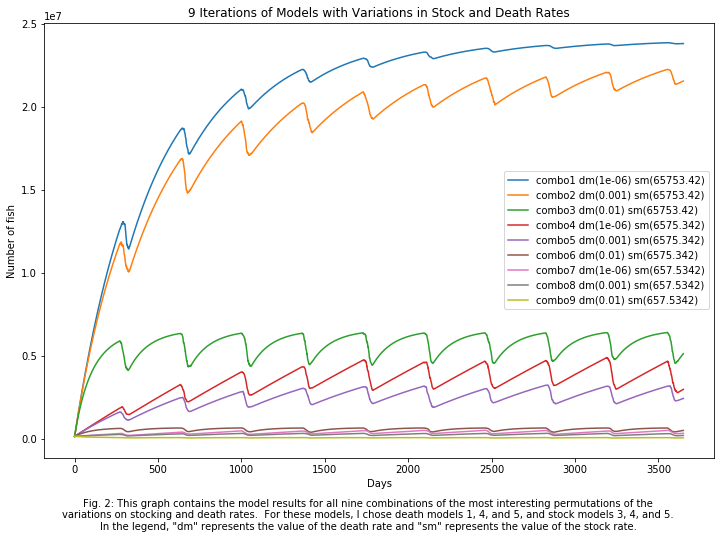

In [0]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt

death_array = np.array([1.0e-06, 1.0e-03, 1.0e-02])
stock_array = np.array([65753.42, 6575.342, 657.5342])
combo_array = list(it.product(stock_array,death_array)) #this is all 9 possible iterations of combining dm1,dm4,dm5, and sm3,sm4,sm5

fig1,ax1 = plt.subplots(1,figsize=(12,8))
fig.subplots_adjust(hspace=0.5)

# Your full factorial model runs and plots go here 
fishy_sa = {}

# Maybe something like this:
for i in range(len(combo_array)):
    #param = [y[i][1], k, x0, y[i][0], mig]
    #param=[stock,death,carry_cap,ini_cond,mig_frac]
    param = [combo_array[i][0], combo_array[i][1], 2.4e7, 1.4e5, 1/3]
    fishy_sa["combo{0}".format(i+1)] = fishy(param, 365*10, .1)
    label ='combo{0} dm({1}) sm({2})'.format(i+1, combo_array[i][1], combo_array[i][0])
    ax1.plot(fishy(param,365*10,.1)[:,0], fishy(param,365*10,.1)[:,1], label=label)

ax1.legend()
ax1.set_title('9 Iterations of Models with Variations in Stock and Death Rates')
ax1.set_ylabel('Number of fish')
ax1.set_xlabel('Days')
fig1.text(.5,0,'Fig. 2: This graph contains the model results for all nine combinations of the most interesting permutations of the' +\
         '\nvariations on stocking and death rates.  For these models, I chose death models 1, 4, and 5, and stock models 3, 4, and 5.' +\
          '\nIn the legend, "dm" represents the value of the death rate and "sm" represents the value of the stock rate.',ha='center')
plt.show()

In [0]:
# I am giving you some help here ... 
fishy_metrics = np.zeros([len(combo_array),6])
for i in range(len(fishy_sa)): #combo_array? #baseline?  n+1?
    #1. Maximum Population = np.max(X[i])
    fishy_metrics[i,0] = np.max(fishy_sa["combo{0}".format(i+1)][:,1])
    #2. Minimum Population = np.min(X[i])
    fishy_metrics[i,1] = np.min(fishy_sa["combo{0}".format(i+1)][:,1])
    #3. Final Population Value = X[n]
    fishy_metrics[i,2] = fishy_sa["combo{0}".format(i+1)][-1,1]
    #4. Average Difference from Baseline = (1/(n+1))np.sum(X[i] - X_baseline[i])
    fishy_metrics[i,3] = np.sum(fishy_sa["combo{0}".format(i+1)][:,1] - fishy_sa["combo3"][:,1])/len(fishy_sa["combo3"][:,1])
    #5. RMS Error from Baseline = np.sqrt(np.sum((X[i] - X_baseline[i])**2)/(n+1))
    fishy_metrics[i,4] = np.sqrt(np.sum((fishy_sa["combo{0}".format(i+1)][:,1] - fishy_sa["combo3"][:,1])**2)/len(fishy_sa["combo3"][:,1]))
    #6. Maximum Difference from Baseline = np.max(np.abs(X[i] - X_baseline[i]))
    fishy_metrics[i,5] = np.max(np.abs(fishy_sa["combo{0}".format(i+1)][:,1] - fishy_sa["combo3"][:,1]))
# These are the values I put in the table.
print("Baseline is Combo3 \n")
print(fishy_metrics)


Baseline is Combo3 

[[23893544.64078334   140000.         23857330.39872797 14888546.51607007
  15529675.2163715  19366225.00795175]
 [22494114.89194753   140000.         21565376.39680596 12905208.27865485
  13500164.41686044 16987984.18880174]
 [ 6405570.23808318   140000.          5046426.67793513        0.
         0.                0.        ]
 [ 5118927.17341938   140000.          3266585.41493655 -2190910.572704
   2311399.19704662  4124363.50446115]
 [ 3166719.7443495    140000.          2017027.81165213 -3360504.01407831
   3391652.1642896   4286631.78433414]
 [  648174.85919145   140000.           512031.46824854 -5037772.06727171
   5091114.09809695  5760658.2551634 ]
 [  545289.03271205   140000.           321318.75646811 -5230997.50999759
   5283581.52852743  5951555.63981142]
 [  341431.75624817   140000.           225232.55312204 -5353357.85261308
   5409142.3065883   6093161.99862178]
 [  140000.            39048.70758273    50144.26621961 -5546183.83890235
   5605325.

In [0]:
t = newTable("Fishy_Table",10,7)
#oh hell I could have just used a pandas dataframe with the columns option